# Week 8-2 한글 리뷰 데이터 전처리

In [5]:
# 예시 리뷰
review1="""
업그레이드 후 에어컨 연결이 자주 끊기고,, 에어컨 삭제후 재등록해도 마찬가지이고,, 작년부터 쌓였던 데이터는 다 날라가고,,,사용은 블편하고,, 향편없네요. 앞으로 업그레이드는 층분히 안정화 한다음 시행하세요. 그리고, 고객이 과거버전도 일정기간(가전은 1년정도 더) 그냥 사용하게 해주세요. 효용없는 업그레이드보다는 고객은 안정적 사용을 더 중요하게 생각하는 사람도 많습니다.
"""

In [6]:
# 문장 분리
import kss

review1_split=kss.split_sentences(review1)
review1_split

['업그레이드 후 에어컨 연결이 자주 끊기고,, 에어컨 삭제후 재등록해도 마찬가지이고,, 작년부터 쌓였던 데이터는 다 날라가고,,,사용은 블편하고,, 향편없네요.',
 '앞으로 업그레이드는 층분히 안정화 한다음 시행하세요.',
 '그리고, 고객이 과거버전도 일정기간(가전은 1년정도 더) 그냥 사용하게 해주세요.',
 '효용없는 업그레이드보다는 고객은 안정적 사용을 더 중요하게 생각하는 사람도 많습니다.']

In [3]:
from hanspell import spell_checker
review1_checked=list(map((lambda x:spell_checker.check(x).checked),review1_split))
review1_checked

['업그레이드 후 에어컨 연결이 자주 끊기고,, 에어컨 삭제 후 재등록해도 마찬가지이고,, 작년부터 쌓였던 데이터는 다 날아가고,,, 사용은 불편하고,, 향 편 없네요.',
 '앞으로 업그레이드는 층분히 안정화한 다음 시행하세요.',
 '그리고, 고객이 과거 버전도 일정 기간(가전은 1년 정도 더) 그냥 사용하게 해주세요.',
 '효용 없는 업그레이드보다는 고객은 안정적 사용을 더 중요하게 생각하는 사람도 많습니다.']

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('D:\kjw\lecture\LG전자_21\week8_텍스트마이닝')
review_df=pd.read_csv("thinq_review.csv")
review_df['comment']

0        추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...
1        그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...
2        퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...
3        에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...
4        LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...
                               ...                        
11374                                              좋아요....
11375                                               좋아요~~~
11376                                               굿뜨~~~♡
11377                                                  굿~~
11378                                             좋아요👍👍👍👍👍
Name: comment, Length: 11379, dtype: object

In [8]:
# 문장 분리
import kss

review_df['comment_n']=review_df['comment'].apply(lambda x: kss.split_sentences(x))

In [9]:
review_df['comment_n']

0        [추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기...
1        [그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다, 앱에서 제품삭제...
2        [퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가...
3        [에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다., 보기는...
4        [LG엡만.서비스오작동기능들이잘안되고짜증나네., 통신사이동하고삼성단말기로교체해야것네...
                               ...                        
11374                                            [좋아요....]
11375                                             [좋아요~~~]
11376                                             [굿뜨~~~♡]
11377                                                [굿~~]
11378                                           [좋아요👍👍👍👍👍]
Name: comment_n, Length: 11379, dtype: object

In [10]:
# 숫자 제거
import re

def remove_num(sent_list):
    p=re.compile("[0-9]+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_num(x))

In [11]:
review_df['comment_n']

0        [추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기...
1        [그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다, 앱에서 제품삭제...
2        [퓨리케어 공기청정기  단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가...
3        [에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다., 보기는...
4        [LG엡만.서비스오작동기능들이잘안되고짜증나네., 통신사이동하고삼성단말기로교체해야것네...
                               ...                        
11374                                            [좋아요....]
11375                                             [좋아요~~~]
11376                                             [굿뜨~~~♡]
11377                                                [굿~~]
11378                                           [좋아요👍👍👍👍👍]
Name: comment_n, Length: 11379, dtype: object

In [12]:
# 문장 부호, 특수 문자 제거

def remove_punc(sent_list):
    p=re.compile("\W+")
    sent_n_remove=[]
    for sentence in sent_list:
        sent_n_remove.append(p.sub(" ", sentence))
    return(sent_n_remove)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_punc(x))

In [13]:
review_df['comment_n']

0        [추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기...
1        [그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다, 앱에서 제품삭제...
2        [퓨리케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...
3        [에너지모니터링 지난달 대비 사용량 이전달하고 이번달하고 바꼈다 , 보기는 했는지 ...
4        [LG엡만 서비스오작동기능들이잘안되고짜증나네 , 통신사이동하고삼성단말기로교체해야것네...
                               ...                        
11374                                               [좋아요 ]
11375                                               [좋아요 ]
11376                                                [굿뜨 ]
11377                                                 [굿 ]
11378                                               [좋아요 ]
Name: comment_n, Length: 11379, dtype: object

In [18]:
# 맞춤법 검사 # 시간 걸림!
from hanspell import spell_checker

def spell_checking(sent_list):
    sent_spell=[]
    for sentence in sent_list:
        sent_spell.append(spell_checker.check(sentence).checked)
    return(sent_spell)
    
review_df['comment_n']=review_df['comment_n'].apply(lambda x: spell_checking(x))

In [19]:
review_df['comment_n']

0        [추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 배...
1        [그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다, 앱에서 제품...
2        [퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가...
3        [에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다, 보기는 했...
4        [LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네, 통신사 이동하고 삼성 단...
                               ...                        
11374                                               [좋아요 ]
11375                                               [좋아요 ]
11376                                                  [굿]
11377                                                 [굿 ]
11378                                               [좋아요 ]
Name: comment_n, Length: 11379, dtype: object

In [20]:
# 명사만 추출
from konlpy.tag import Okt  
okt=Okt()  

def noun_selection(sent_list):    
    sent_tokens=[]
    for sentence in sent_list:
        sent_tokens.append(okt.nouns(sentence))
    return(sent_tokens)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: noun_selection(x))

In [21]:
review_df['comment_n']

0        [[추가, 정보, 등록, 앱, 설정, 수, 굳이, 기기, 화면, 상단, 배치, 개인...
1        [[그냥, 엘지, 제품, 리모컨, 사용, 것, 정신, 건강, 듯], [앱, 제품, ...
2        [[퓨리, 케어, 공기청정기, 단, 사용, 중, 언제, 어플, 공기청정기, 수치, ...
3        [[에너지, 모니터링, 지난달, 대비, 용량, 이, 전달, 이번, 달], [보기, ...
4        [[옙, 서비스, 작동, 기능, 짜증], [통신사, 이동, 삼성, 단말기, 교체],...
                               ...                        
11374                                                 [[]]
11375                                                 [[]]
11376                                                [[굿]]
11377                                                [[굿]]
11378                                                 [[]]
Name: comment_n, Length: 11379, dtype: object

In [22]:
# 불용어 처리
def rem_n_stopwords(sent_list):
    stopwords=['이','거','것','저','또','도','나','더','그','일','말','제','수','안','줄','게','좀','듯','점','등','고','요','후','왜','때']
    sent_stop=[]
    for sentence in sent_list:
        new_sent=[]
        for token in sentence:
            if token not in stopwords:
                new_sent.append(token)
        sent_stop.append(new_sent)
    return(sent_stop)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: rem_n_stopwords(x))

In [23]:
review_df['comment_n']

0        [[추가, 정보, 등록, 앱, 설정, 굳이, 기기, 화면, 상단, 배치, 개인, 정...
1        [[그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강], [앱, 제품, 삭제, 제품...
2        [[퓨리, 케어, 공기청정기, 단, 사용, 중, 언제, 어플, 공기청정기, 수치, ...
3        [[에너지, 모니터링, 지난달, 대비, 용량, 전달, 이번, 달], [보기, 달, ...
4        [[옙, 서비스, 작동, 기능, 짜증], [통신사, 이동, 삼성, 단말기, 교체],...
                               ...                        
11374                                                 [[]]
11375                                                 [[]]
11376                                                [[굿]]
11377                                                [[굿]]
11378                                                 [[]]
Name: comment_n, Length: 11379, dtype: object

In [24]:
# 빈 리스트 제거
def remove_empty_list(sent_list):
    removed_list = []
    for sentence in sent_list:
        if sentence: # sentence가 빈 경우가 아니면
            removed_list.append(sentence)    
    return removed_list

review_df['comment_n']=review_df['comment_n'].apply(lambda x: remove_empty_list(x))

review_df.to_csv('thinq_review_result.csv',index=False, encoding='utf-8-sig')

In [25]:
review_df['comment_n']

0        [[추가, 정보, 등록, 앱, 설정, 굳이, 기기, 화면, 상단, 배치, 개인, 정...
1        [[그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강], [앱, 제품, 삭제, 제품...
2        [[퓨리, 케어, 공기청정기, 단, 사용, 중, 언제, 어플, 공기청정기, 수치, ...
3        [[에너지, 모니터링, 지난달, 대비, 용량, 전달, 이번, 달], [보기, 달, ...
4        [[옙, 서비스, 작동, 기능, 짜증], [통신사, 이동, 삼성, 단말기, 교체],...
                               ...                        
11374                                                   []
11375                                                   []
11376                                                [[굿]]
11377                                                [[굿]]
11378                                                   []
Name: comment_n, Length: 11379, dtype: object

In [26]:
# 리뷰 전체를 한 리스트로 만들기
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

review_df['comment_n']=review_df['comment_n'].apply(lambda x: one_word_list(x))

In [27]:
review_df['comment_n']

0        [추가, 정보, 등록, 앱, 설정, 굳이, 기기, 화면, 상단, 배치, 개인, 정보...
1        [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 앱, 제품, 삭제, 제품, 전...
2        [퓨리, 케어, 공기청정기, 단, 사용, 중, 언제, 어플, 공기청정기, 수치, 표...
3        [에너지, 모니터링, 지난달, 대비, 용량, 전달, 이번, 달, 보기, 달, 시작,...
4        [옙, 서비스, 작동, 기능, 짜증, 통신사, 이동, 삼성, 단말기, 교체, 별, ...
                               ...                        
11374                                                   []
11375                                                   []
11376                                                  [굿]
11377                                                  [굿]
11378                                                   []
Name: comment_n, Length: 11379, dtype: object

In [28]:
# 단어 빈도 그래프
total_word=[]
for i in range(len(review_df)):
    total_word.extend(review_df.loc[i,'comment_n'])

pd.Series(total_word).value_counts().head(15)


연결      1810
사용      1700
앱       1600
에어컨     1062
제품      1048
업데이트    1027
등록       998
기능       911
어플       845
세탁기      595
다시       586
와이파이     553
굿        498
건조기      471
알림       466
dtype: int64

<AxesSubplot:>

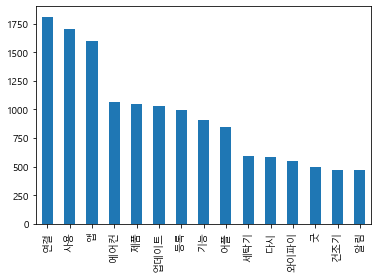

In [29]:
# 단어 빈도 그래프
# 한글 폰트 사용
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pd.Series(total_word).value_counts().head(15).plot(kind='bar')


<AxesSubplot:>

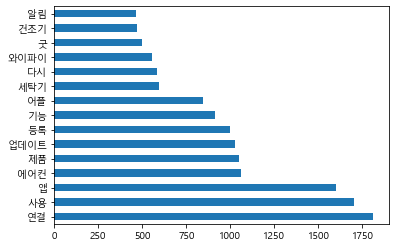

In [30]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh')

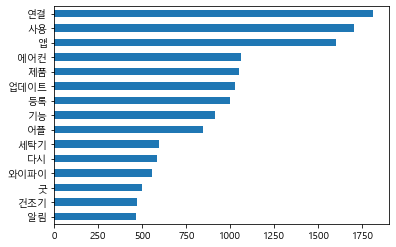

In [31]:
pd.Series(total_word).value_counts().head(15).plot(kind='barh').invert_yaxis()